# Baseline

**Proyecto Integrador TC5035.10**

**Profesor Asesor:**
- Dra. Ludivina Facundo (ITESM)


**Profesores Investigadores/Tutores:**
- Dr. Juan Arturo Nolazco (ITESM)
- Dr. Marcos Faunez Zaunuy (TecnoCampus Barcelona)

**Equipo 11:**
- Francisco José Arellano Montes (A01794283)
- Armando Bringas Corpus (A01200230)
- Moisés Díaz Malagón (A01208580)

Este avance consiste en construir un modelo de referencia que permita evaluar la viabilidad del problema. Si el baseline tiene un rendimiento similar al azar, podría indicar que el problema es intrínsecamente difícil o que los datos no contienen suficiente información para predecir el objetivo. De lo contrario, el baseline podría como una solución mínima aceptable cuando se trabaja en escenarios donde incluso un modelo simple puede proporcionar valor.



In [95]:
# Bibliotecas para manejo de datos
import numpy as np
import pandas as pd

# Bibliotecas para preprocesamiento y transformación
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Bibliotecas para reducción de dimensionalidad
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.decomposition import PCA

# Biblioteca para transformadas wavelet
import pywt

# Bibliotecas para visualización
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_validate, RepeatedStratifiedKFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder, PowerTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.inspection import permutation_importance



In [96]:
def cargar_datos():
    """
    Carga los datos preprocesados del análisis exploratorio
    """
    X_train = pd.read_parquet('../data/preprocessed/X_train.parquet')
    y_train = pd.read_parquet('../data/raw_binary/y_train.parquet')
    X_val = pd.read_parquet('../data/preprocessed/X_val.parquet')
    y_val = pd.read_parquet('../data/raw_binary/y_val.parquet')
    X_test = pd.read_parquet('../data/preprocessed/X_test.parquet')
    y_test = pd.read_parquet('../data/raw_binary/y_test.parquet')
    return X_train, y_train, X_val, y_val, X_test, y_test

In [97]:
X_train, y_train, X_val, y_val, X_text, y_test = cargar_datos()

Proporcion en train set: 0.27
Proporcion en validation set: 0.27
Proporcion en test set: 0.27


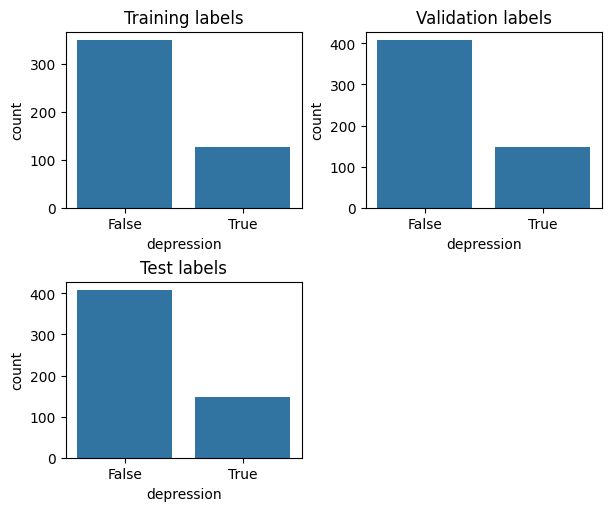

In [98]:
plt.figure(figsize=(6,5), constrained_layout=True)
ax = plt.subplot(2, 2, 1)
ax = sns.countplot(y_train, x='depression')
ax.set_title('Training labels')

ax = plt.subplot(2, 2, 2)
ax = sns.countplot(y_val, x='depression')
ax.set_title('Validation labels')

ax = plt.subplot(2, 2, 3)
ax = sns.countplot(y_test, x='depression')
ax.set_title('Test labels')


print(f'Proporcion en train set: {y_train["depression"].mean():.2f}')
print(f'Proporcion en validation set: {y_val["depression"].mean():.2f}')
print(f'Proporcion en test set: {y_test["depression"].mean():.2f}')

Primeramente podemos comprobar que se mantiene el balancen de clases en los 3 sets de datos, entrenamiento, validación y prueba para la etiqueta 'depression'.


TODO: poner el de las otras dos labels


# Análisis de balance de clases

Porcentaje de la clase positiva de Depression: 0.27
Porcentaje de la clase positiva de Anxiety: 0.43
Porcentaje de la clase positiva de Stress: 0.43


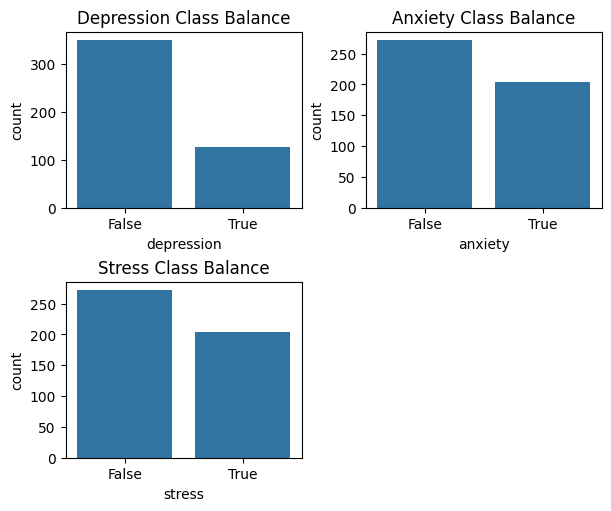

In [99]:
plt.figure(figsize=(6,5), constrained_layout=True)
ax = plt.subplot(2, 2, 1)
ax = sns.countplot(y_train, x='depression')
ax.set_title('Depression Class Balance')

ax = plt.subplot(2, 2, 2)
ax = sns.countplot(y_train, x='anxiety')
ax.set_title('Anxiety Class Balance')

ax = plt.subplot(2, 2, 3)
ax = sns.countplot(y_train, x='stress')
ax.set_title('Stress Class Balance')


print(f'Porcentaje de la clase positiva de Depression: {y_train["depression"].mean():.2f}')
print(f'Porcentaje de la clase positiva de Anxiety: {y_val["anxiety"].mean():.2f}')
print(f'Porcentaje de la clase positiva de Stress: {y_test["stress"].mean():.2f}')

Dado que se trabajará como 3 problemas de clasificación binaria independientes, se puede comprobar que no tenemos un problema de datos no balanceados pues para las 3 variables estamos dentro de un 80/20 de proporciones entre la clase negativa y la positiva para cada label.

Con el balance de clases positivas, se establece el desempeño mínimo a obtener para verificar que el modelo baseline no está sub-entrenado.

In [100]:
print(f"Expected minimum accuracy for depression: {y_train['depression'].mean():.4f}")
print(f"Expected minimuma ccuracy for anxiety: {y_train['anxiety'].mean():.4f}")
print(f"Expected minimum accuracy for stress: {y_train['stress'].mean():.4f}")

Expected minimum accuracy for depression: 0.2668
Expected minimuma ccuracy for anxiety: 0.4286
Expected minimum accuracy for stress: 0.4286


# Métrica

Dado que se trabajará con un 3 problemas independientes de clasificación binaria, se utilizarán las siguientes métricas:
TODO: Completar descripción, y justificar el por qué de cada una. E.g. f1 para clases no tan balanceadas. 

- accuracy:
- precision:
- recall:
- f1:
- roc_auc:

De acuerdo con el contexto de negocio, que es el diagnóstico psicológico y considerando el factor de la sugestión, será importante reducir la cantidad de Falsos Positivos (error tipo 1) que significa que queremos reducir el número de casos donde le decimos a un paciente que tiene depresión cuando en realidad no lo tiene. Por lo tanto la métrica a optimizar será precision. 

TODO: definir con los doctores


De acuerdo con el balanceo de clases, ya que se cuenta con una mínima proporcion que no supera el 80/20 podemos decir que no se esperan afectaciones en el aprendizaje para la clase minoritaria (positiva), sin embargo si es necesario en la siguiente mejora del modelo se utilizarán técnicas de balanceo de clase al menos para el caso de "depression".

# Algoritmo y entrenamiento

¿Qué algoritmo se puede utilizar como baseline para predecir las variables objetivo?

[TODO: Se explica por qué el algoritmo seleccionado es apropiado para el tipo de problema que se está abordando. Se considera en el análisis aspectos clave, como el tipo (estructurados o no estructurados) y la cantidad de datos, la presencia de características relevantes, la interpretabilidad (si es importante), entre otros.]


In [108]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((476, 4), (476, 3), (556, 4), (556, 3))

In [128]:
# expandimos los valores de serie de tiempo correspondientes a las coordenadas 'x' y 'y' para que puedan ser utilizados en los algoritmos como si se tratase de características independientes (aunque son series temporales).
# concatenamos los valores de 'x' y 'y' tanto de entrenamiento como de validación para realizar validación cruzada

features_x_train = pd.DataFrame(X_train['caracteristica_0'].to_list())
features_y_train = pd.DataFrame(X_train['caracteristica_1'].to_list())
all_features_train = pd.concat([features_x_train, features_y_train], axis=1)

features_x_val = pd.DataFrame(X_val['caracteristica_0'].to_list())
features_y_val = pd.DataFrame(X_val['caracteristica_1'].to_list())
all_features_val = pd.concat([features_x_val, features_y_val], axis=1)

Xtrainval = pd.concat([all_features_train, all_features_val], axis=0)


In [129]:
# generamos 3 labels independientes para cada uno de los 3 problemas de clasificación

ytrainval_depression = pd.concat([y_train['depression'], y_val['depression']], axis=0)
ytrainval_anxiety = pd.concat([y_train['anxiety'], y_val['anxiety']], axis=0)
ytrainval_stress = pd.concat([y_train['stress'], y_val['stress']], axis=0)

In [130]:
Xtrainval.shape, ytrainval_depression.shape

((1032, 12), (1032,))

In [145]:
log_model = LogisticRegression()
  
log_model.fit(Xtrainval, ytrainval_depression)

yhat = log_model.predict(Xtrainval)
print(classification_report(ytrainval_depression, yhat))
print("Metrica ROC test: ", np.round(roc_auc_score(ytrainval_depression, yhat), 2))  

              precision    recall  f1-score   support

       False       0.73      1.00      0.85       757
        True       0.00      0.00      0.00       275

    accuracy                           0.73      1032
   macro avg       0.37      0.50      0.42      1032
weighted avg       0.54      0.73      0.62      1032

Metrica ROC test:  0.5


/Users/moisesdiaz/Library/Caches/pypoetry/virtualenvs/proyecto-integrador-equipo-11-RpNcPuS5-py3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/moisesdiaz/Library/Caches/pypoetry/virtualenvs/proyecto-integrador-equipo-11-RpNcPuS5-py3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/moisesdiaz/Library/Caches/pypoetry/virtualenvs/proyecto-integrador-equipo-11-RpNcPuS5-py3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWar

#### Loss function y curvas de aprendizaje

# Análisis de sub/sobreajuste

[TODO: Se comparan diferentes métricas de evaluación del modelo en los conjuntos de entrenamiento y prueba para concluir si hay sub/sobreajuste. Se pueden utilizar curvas de aprendizaje, técnicas de validación cruzada o inspección de gráficos de residuos para complementar el análisis.]

¿El modelo está sub/sobreajustando los datos de entrenamiento?

[tomar como referencia este análsis: No se observa sobre-entrenamiento pues la diferencia de accuracy entre test y train no es mayor al 3%. No se observa bajo-entrenamiento porque el porcentaje de accuracy es mayor a 0.56 que es el nuevo porcentaje de clase mayoritaria despues de las técnicas de bajo y sobre muestreo.]


# Análisis de características importantes

[Se hace un análisis de la relevancia de las características, si aplica, utilizando métodos de selección (filter, embedded, wrapper) o extracción de características (PCA, FA, …) Se incluye una representación visual del resultado para facilitar la interpretación.]



¿Se puede determinar la importancia de las características para el modelo generado? Recuerden que incluir características irrelevantes puede afectar negativamente el rendimiento del modelo y aumentar la complejidad sin beneficios sustanciales.


# Conclusiones

# Referencias